# **Paquetes necesarios**

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


# **Lectura de la base de datos**

In [2]:
# Base de datos  https://www.kaggle.com/liujiaqi/hr-comma-sepcsv
# ==============================================================================

url = 'https://drive.google.com/file/d/1HWPi-Bf0jjc_BMfGaGw-bfYMcKW5LdKQ/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
datos = pd.read_csv(path)

datos.info()
datos.head(10)
datos.describe()
datos.shape
columns_names=datos.columns.tolist()
print("Columns names:");print(columns_names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
Columns names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


In [3]:
datos.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Seleccionamos variables numéricas


In [4]:
X= datos [['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


# **Medidas descriptivas multivariadas**

   **Vector de medias**
     
  

In [5]:
print('-------------------------------')
print('Cálculo matricial para la media')
print('-------------------------------')
n=X.shape[0]
n_ones=np.array(np.ones(n))
m=X.T @ n_ones/n
m
print('---------------------')
print('Usando comando "mean"')
print('---------------------')
Media=X.mean(axis=0)
Media

-------------------------------
Cálculo matricial para la media
-------------------------------
---------------------
Usando comando "mean"
---------------------


satisfaction_level        0.612834
last_evaluation           0.716102
number_project            3.803054
average_montly_hours    201.050337
time_spend_company        3.498233
dtype: float64

**Matriz de varianzas y covarianzas**

In [6]:
print('--------------------------------------------------------')
print('Cálculo matricial para matriz de varianzas y covarianzas')
print('--------------------------------------------------------')
P=np.eye(n)-np.ones((n,n))/n
T= X.T @ P @ X
T
S=round(T/(n-1),2)
S

--------------------------------------------------------
Cálculo matricial para matriz de varianzas y covarianzas
--------------------------------------------------------


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,0.06,0.00,-0.04,-0.25,-0.04
last_evaluation,0.00,0.03,0.07,2.90,0.03
number_project,-0.04,0.07,1.52,25.68,0.35
average_montly_hours,-0.25,2.90,25.68,2494.31,9.32
time_spend_company,-0.04,0.03,0.35,9.32,2.13


In [7]:
print('---------------------')
print('Usando comando "cov"')
print('---------------------')
S= np.cov(X,rowvar=False)
np.around(S,4)


---------------------
Usando comando "cov"
---------------------


array([[ 6.1800000e-02,  4.5000000e-03, -4.3800000e-02, -2.4890000e-01,
        -3.6600000e-02],
       [ 4.5000000e-03,  2.9300000e-02,  7.3700000e-02,  2.9044000e+00,
         3.2900000e-02],
       [-4.3800000e-02,  7.3700000e-02,  1.5193000e+00,  2.5683300e+01,
         3.5420000e-01],
       [-2.4890000e-01,  2.9044000e+00,  2.5683300e+01,  2.4943132e+03,
         9.3164000e+00],
       [-3.6600000e-02,  3.2900000e-02,  3.5420000e-01,  9.3164000e+00,
         2.1320000e+00]])

**Matriz de correlación**

In [8]:
print('----------------------')
print(' Usando comando "corr')
print('----------------------')

corrX = X.corr(method='pearson')
corrX

----------------------
 Usando comando "corr
----------------------


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


**Ejercicio:** 

1- Encontrar la matriz de correlación a partir de la matriz de varianzas y covarianzas usando cálculo matricial.

Cov(X,Y)/sigmaX*sigmaY



2- ¿A qué es igual la matriz de varianzas y covarianzas de los datos estandarizados?


Es la misma 

In [9]:
#compute standard deviations of each of the 6 features
stds = np.std(X, axis = 0) #shape = (6,)

stds_matrix = np.array([[stds[i]*stds[j] for j in range(5)] for i in range(5)])

print("standard deviations matrix of shape:",stds_matrix.shape)

standard deviations matrix of shape: (5, 5)


In [10]:
new_corr = S/stds_matrix

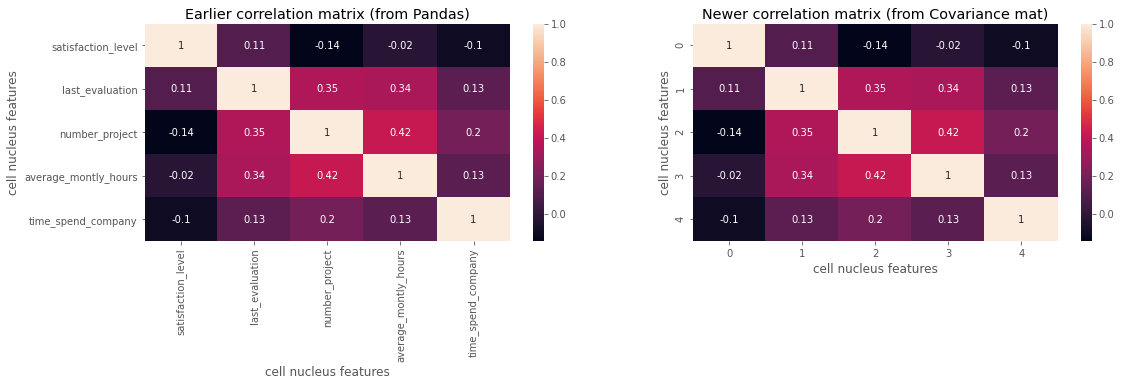

In [11]:
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)

sns.heatmap(corrX, annot = True)

plt.title("Earlier correlation matrix (from Pandas)")

plt.xlabel("cell nucleus features")

plt.ylabel("cell nucleus features")

plt.subplot(1,2,2)

sns.heatmap(new_corr, annot = True)

plt.title("Newer correlation matrix (from Covariance mat)")

plt.xlabel("cell nucleus features")

plt.ylabel("cell nucleus features")

plt.show()


Text(0.5, 1.0, 'Matriz de correlación')

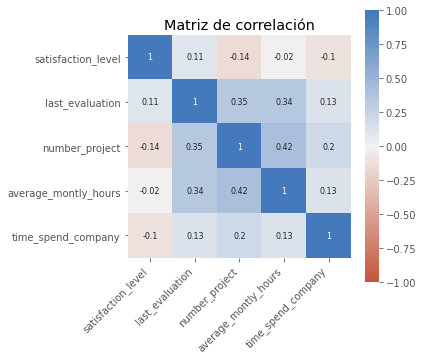

In [12]:
# Heatmap matriz de correlaciones. Usando paquete matplotlib.pyplot
# ==================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(corrX,
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 250, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)
plt.title('Matriz de correlación')


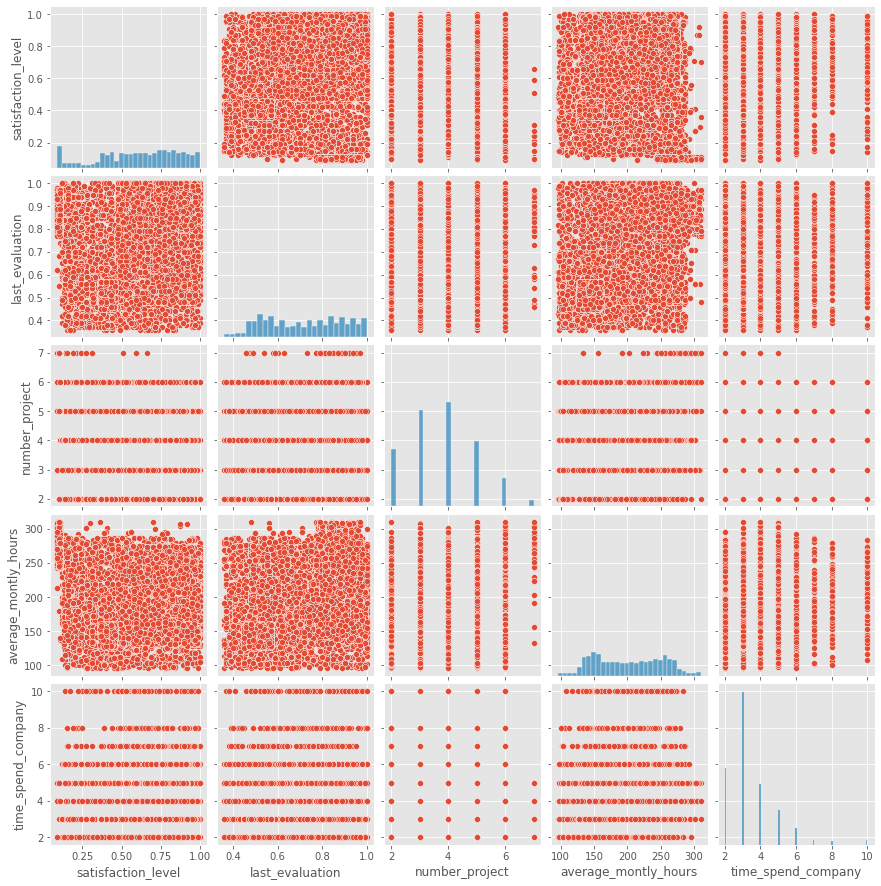

In [13]:
# Matriz de gráficos de dispersión. Usando paquete seaborn
# ==================================================================
sns.pairplot(X, aspect=1)

#**Análisis de componentes principales (ACP)**

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://arxiv.org/pdf/0909.4061.pdf (algoritmo utilizado para la descomposición singular de la matriz)

**Utilizando la descomposición espectral de la matriz**



In [14]:
print('-----------------------------------------------')
print('Cálculo de la matriz de varianzas y covarianzas y la varianza total (traza de la matriz)')
print('------------------------------------------------')

S= np.cov(X,rowvar=False)
#S=X.corr(method='pearson')
print(S)

print('-----------------------------------')
print('Varianza total (traza de la matriz)')
print('-----------------------------------')

VT=np.trace(S)
print(VT)

-----------------------------------------------
Cálculo de la matriz de varianzas y covarianzas y la varianza total (traza de la matriz)
------------------------------------------------
[[ 6.18172006e-02  4.46948100e-03 -4.38144936e-02 -2.48945147e-01
  -3.66178765e-02]
 [ 4.46948100e-03  2.92988644e-02  7.37027964e-02  2.90435613e+00
   3.28884982e-02]
 [-4.38144936e-02  7.37027964e-02  1.51928391e+00  2.56832707e+01
   3.54165950e-01]
 [-2.48945147e-01  2.90435613e+00  2.56832707e+01  2.49431317e+03
   9.31636444e+00]
 [-3.66178765e-02  3.28884982e-02  3.54165950e-01  9.31636444e+00
   2.13199781e+00]]
-----------------------------------
Varianza total (traza de la matriz)
-----------------------------------
2498.0555726011476


In [15]:
print('-------------------------------')
print('Valores y vectores propios de S')
print('-------------------------------')

eigenvalue, featurevector = np.linalg.eig(S)

print("Autovalores:", eigenvalue)

print("Vector de características:", featurevector)

print('-----------------------')
print('Suma de varianzas de CP')
print('------------------------')
##la suma de las valores propios (varianzas de las CP) es igual a la Varianza Total

print(sum(eigenvalue))

print('---------------------------------------------')
print('Porcentaje de variabilidad de cada componente')
print('---------------------------------------------')

porc=eigenvalue/(sum(eigenvalue))*100
Autovalores=pd.DataFrame((eigenvalue,porc),
                       index = ['Autovalores','% de Varianza'],
                      columns  =['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
Autovalores


-------------------------------
Valores y vectores propios de S
-------------------------------
Autovalores: [2.49461602e+03 2.17146686e+00 1.18379217e+00 6.11299786e-02
 2.31677558e-02]
Vector de características: [[-1.00023123e-04  2.15625951e-02 -2.65016712e-02  9.84713759e-01
   1.70796718e-01]
 [ 1.16454621e-03 -1.53871878e-02  3.10255289e-02  1.71931566e-01
  -9.84499280e-01]
 [ 1.03016962e-02 -2.72501618e-01  9.60984851e-01  2.50779021e-02
   3.89353018e-02]
 [ 9.99939262e-01  6.42378499e-03 -8.91673418e-03 -4.05781895e-04
   7.30542316e-04]
 [ 3.73903664e-03 -9.61769147e-01 -2.73429489e-01  1.22181766e-02
   8.55325409e-03]]
-----------------------
Suma de varianzas de CP
------------------------
2498.0555726011494
---------------------------------------------
Porcentaje de variabilidad de cada componente
---------------------------------------------


,PC1,PC2,PC3,PC4,PC5
Autovalores,2494.616016,2.171467,1.183792,0.061130,0.023168
% de Varianza,99.862311,0.086926,0.047389,0.002447,0.000927


In [16]:
Autovalores.T.sum()

Autovalores      2498.055573
% de Varianza     100.000000
dtype: float64

<AxesSubplot:>

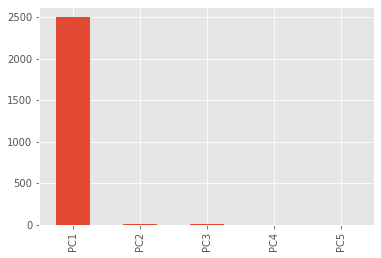

In [17]:
Autovalores.T['Autovalores'].plot(kind = 'bar')

In [18]:
Autovectores=pd.DataFrame((featurevector),
                       index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
                      columns  =['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'])

Autovectores =round (Autovectores, 4)
Autovectores

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
PC1,-0.0001,0.0216,-0.0265,0.9847,0.1708
PC2,0.0012,-0.0154,0.0310,0.1719,-0.9845
PC3,0.0103,-0.2725,0.9610,0.0251,0.0389
PC4,0.9999,0.0064,-0.0089,-0.0004,0.0007
PC5,0.0037,-0.9618,-0.2734,0.0122,0.0086


In [19]:
print('-------------------------------')
print('Covarianzas y correlaciones entre las variables orginales y las componentes principales- Cälculo matricial')
print('-------------------------------')
print('Covarianzas')
print('-------------------------------')
CovX_Y=pd.DataFrame((S @featurevector),
                       index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
                      columns  =['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'])
CovX_Y




-------------------------------
Covarianzas y correlaciones entre las variables orginales y las componentes principales- Cälculo matricial
-------------------------------
Covarianzas
-------------------------------


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
PC1,-0.249519,0.046822,-0.031372,0.060196,0.003957
PC2,2.905096,-0.033413,0.036728,0.010510,-0.022809
PC3,25.698776,-0.591728,1.137606,0.001533,0.000902
PC4,2494.464499,0.013949,-0.010556,-0.000025,0.000017
PC5,9.327461,-2.088450,-0.323684,0.000747,0.000198


In [20]:
#Matriz con autovalores
M_eigen=np.diag(eigenvalue)
CovX_Y_1=pd.DataFrame((featurevector @ M_eigen),
                       index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
                      columns  =['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'])
CovX_Y_1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
PC1,-0.249519,0.046822,-0.031372,0.060196,0.003957
PC2,2.905096,-0.033413,0.036728,0.010510,-0.022809
PC3,25.698776,-0.591728,1.137606,0.001533,0.000902
PC4,2494.464499,0.013949,-0.010556,-0.000025,0.000017
PC5,9.327461,-2.088450,-0.323684,0.000747,0.000198


In [21]:

print('-------------------------------')
print('Correlaciones entre variables y CP')
print('-------------------------------')

# Matriz diagonal con los desviaciones estandar de las CP
RM_eigen=np.sqrt(M_eigen)
print(RM_eigen)
# Matriz diagonal con los desviaciones estandar de las CP
Diag=(np.diag(1/np.diag(np.sqrt(S))))
print(Diag)


CorX_Y=pd.DataFrame((Diag @featurevector  @ RM_eigen),
                    index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
                      columns  =['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'])
CorX_Y

-------------------------------
Correlaciones entre variables y CP
-------------------------------
[[49.94613114  0.          0.          0.          0.        ]
 [ 0.          1.47358979  0.          0.          0.        ]
 [ 0.          0.          1.08802214  0.          0.        ]
 [ 0.          0.          0.          0.24724477  0.        ]
 [ 0.          0.          0.          0.          0.15220958]]
[[4.02203025 0.         0.         0.         0.        ]
 [0.         5.84217559 0.         0.         0.        ]
 [0.         0.         0.81129823 0.         0.        ]
 [0.         0.         0.         0.02002279 0.        ]
 [0.         0.         0.         0.         0.6848676 ]]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
PC1,-0.020093,0.127798,-0.115973,0.979225,0.104560
PC2,0.339808,-0.132468,0.197211,0.248346,-0.875451
PC3,0.417437,-0.325781,0.848271,0.005030,0.004808
PC4,1.000000,0.000190,-0.000194,-0.000002,0.000002
PC5,0.127899,-0.970631,-0.203746,0.002069,0.000892


**Ejercicio**

a) Calcular el desvio estandar de la primera componente.
 
b) Determine la expresión analítica de la primera componente.

c) Realice el mismo análisis con los datos estandarizados


